In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR

In [3]:
np.random.seed(0)
# 分别生成两个20*2维正态数组，其中第一个以[-2,-2]为中心,第二个以[2,2]为中心
x = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
# np.r_表示按列连接两个矩阵
# 生成类别变量y，前20个为0，后20个为1
y = [0] * 20 + [1] * 20

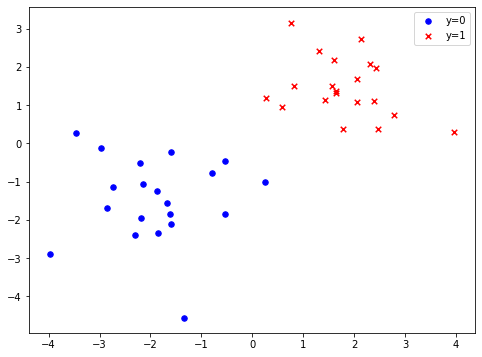

In [5]:
fig, ax = plt.subplots(figsize=(8,6))  #创建子图，大小为8*5
#构建y=0的散点图，设置散点形状为o
ax.scatter(x[0:20,1], x[0:20,0], s=30, c='b', marker='o', label='y=0')
#构建y=1的散点图，设置散点形状为x
ax.scatter(x[20:40,1], x[20:40,0], s=30, c='r', marker='x', label='y=1')
ax.legend()  #设置图例
plt.show()

In [7]:
clf = SVC(kernel='linear') ##设定模型为线性核函数的SVM
clf.fit(x, y)  #训练数据

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)